In [1]:
!pip install vaderSentiment
import tweepy
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "QJ9jh7nbiMk2IY7gO9Gy40ELV"
consumer_secret = "FTaNnVGTt0QHhWkjGBXhsIJpIVY4mnl7Fcydcvg5nhhyfyGsq6"
access_token = "937021965612675072-mIwR7JRHazmiSHDQtBSZbAkEmL9YgY6"
access_token_secret = "j8gsWqviJk6ry6XErtRsgljOor8BgDGd7t12MB4m9J4WB"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [2]:
# Target User Account
newsCompany = ["@FoxNews","@nytimesworld","@CNN","@CBSNews","@BBCWorld"]

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
post_sentiment = []

In [3]:
for news in newsCompany:
    counter = 1 
    for item in tweepy.Cursor(api.user_timeline, id=news).items(100):
        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
        news_dict = {
            'source':news,
            'date': tweet["created_at"],
            'text': text,
            'compound': compound,
            'positive': pos,
            'negative': neg,
            'tweets ago': counter
        }
        post_sentiment.append(news_dict)
        counter +=1

newsDF = pd.DataFrame(post_sentiment)
newsDF.to_csv("Twitter News Data.csv",index=False, header=True)
newsDF

,compound,date,negative,positive,source,text,tweets ago
0,-0.7845,Thu Dec 14 02:00:25 +0000 2017,0.496,0.000,@FoxNews,Russell Simmons accused of rape by four women ...,1
1,0.1280,Thu Dec 14 01:45:43 +0000 2017,0.113,0.136,@FoxNews,"On #TheStory, @GovMikeHuckabee said ""we can do...",2
2,-0.2960,Thu Dec 14 01:41:17 +0000 2017,0.155,0.000,@FoxNews,".@tavissmiley accused of sexual misconduct, @P...",3
3,0.0000,Thu Dec 14 01:34:49 +0000 2017,0.000,0.000,@FoxNews,.@KimStrassel on getting the @FBI to cooperate...,4
4,0.0000,Thu Dec 14 01:22:18 +0000 2017,0.000,0.000,@FoxNews,.@JonathanTurley on possible investigation int...,5
5,-0.6249,Thu Dec 14 01:03:51 +0000 2017,0.231,0.000,@FoxNews,.@GovMikeHuckabee on critics of his daughter: ...,6
6,0.4939,Thu Dec 14 01:01:35 +0000 2017,0.000,0.151,@FoxNews,.@GovMikeHuckabee on Mika Brzezinski's comment...,7
7,0.1027,Thu Dec 14 01:01:14 +0000 2017,0.086,0.152,@FoxNews,An empty @Airbus plane was feeling the #Christ...,8
8,0.6833,Thu Dec 14 00:51:52 +0000 2017,0.000,0.188,@FoxNews,.@Jim_Jordan on Peter Strzok's text messages: ...,9
9,0.0000,Thu Dec 14 00:49:07 +0000 2017,0.000,0.000,@FoxNews,".@Jim_Jordan on Peter Strzok: ""He needs to be ...",10


In [4]:
foxDF = newsDF["source"] == "@FoxNews"
foxDF = newsDF[foxDF]

nyDF = newsDF["source"] == "@nytimesworld"
nyDF = newsDF[nyDF]

cnnDF = newsDF["source"] == "@CNN"
cnnDF = newsDF[cnnDF]

cbsDF = newsDF["source"] == "@CBSNews"
cbsDF = newsDF[cbsDF]

bbcDF = newsDF["source"] == "@BBCWorld"
bbcDF = newsDF[bbcDF]

In [5]:
xAxisFox = foxDF["tweets ago"]
yAxisFox = foxDF["compound"]
plt.scatter(xAxisFox,yAxisFox,s=50, facecolors = "red", edgecolors = "black",
            label="Fox", alpha = .5)

xAxisNY = nyDF["tweets ago"]
yAxisNY = nyDF["compound"]
plt.scatter(xAxisNY,yAxisNY,s=50, facecolors = "green", edgecolors = "black",
            label="NY Times", alpha = .5)

xAxisCNN = cnnDF["tweets ago"]
yAxisCNN = cnnDF["compound"]
plt.scatter(xAxisCNN,yAxisCNN,s=50, facecolors = "blue", edgecolors = "black",
            label="CNN", alpha = .5)

xAxisCBS = cbsDF["tweets ago"]
yAxisCBS = cbsDF["compound"]
plt.scatter(xAxisCBS,yAxisCBS,s= 50, facecolors = "yellow", edgecolors = "black",
            label="CBS", alpha = .5)

xAxisBBC = bbcDF["tweets ago"]
yAxisBBC = bbcDF["compound"]
plt.scatter(xAxisBBC,yAxisBBC,s= 50, facecolors = "lightskyblue", edgecolors = "black",
            label="BBC", alpha = .5) 

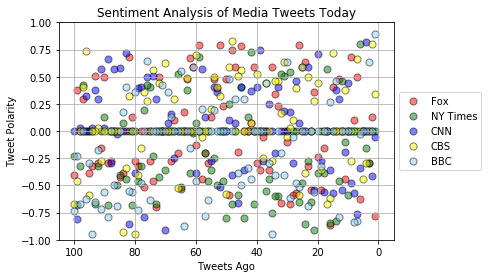

In [6]:
plt.title("Sentiment Analysis of Media Tweets Today")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")


#plt.figure(figsize=(400, 400))
plt.grid('on')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(105,-5)
plt.ylim(-1,1)

plt.savefig("Sentiment Analysis of Media.png")

plt.show()

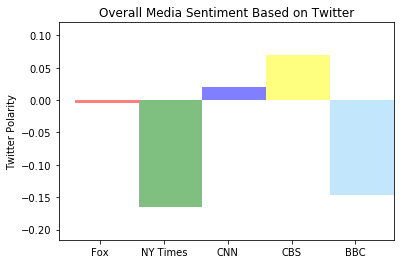

In [7]:
foxMean = foxDF["compound"].mean()
nyMean = nyDF["compound"].mean()
cnnMean = cnnDF["compound"].mean()
cbsMean = cbsDF["compound"].mean()
bbcMean = bbcDF["compound"].mean()

meanList = [foxMean, nyMean, cnnMean, cbsMean, bbcMean]
colors = ["red","Green","blue","yellow","lightskyblue"]

xAxis = np.arange(len(meanList))
tickLoc = [value+0.4 for value in xAxis]

plt.bar(xAxis, meanList, color=colors, width = 1, alpha=0.5, align="edge")

plt.xticks(tickLoc, ["Fox", "NY Times", "CNN", "CBS", "BBC"])
plt.xlim(-0.25, len(xAxis))
plt.ylim(min(meanList)-.05, max(meanList)+0.05)


plt.title("Overall Media Sentiment Based on Twitter")
#plt.xlabel("Programming Language")
plt.ylabel("Twitter Polarity")

plt.savefig("Overall Media Sentiment.png")

plt.show()